In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

recipes = pd.read_parquet("../data/recipes.parquet")
reviews = pd.read_parquet("../data/reviews.parquet")

In [2]:
# recipes.head()
recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [3]:
reviews.head()
reviews.columns


Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')

### Understanding behaviour of Authors in both datasets

Only 0.0302% of AuthorId have at least 20 reviews.


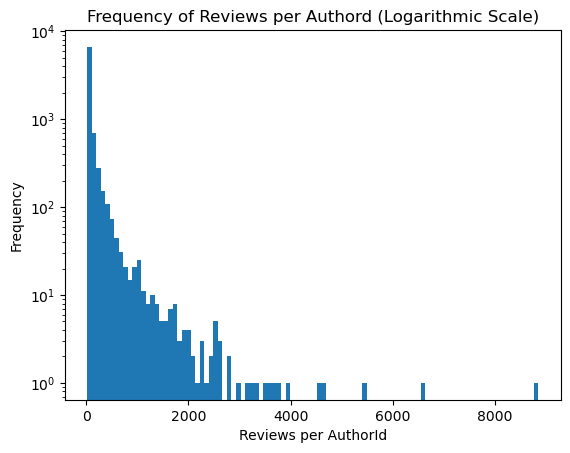

In [4]:
authors_review_counts = reviews.groupby(['AuthorId']).size().sort_values()
print(f"Only {np.round(len(authors_review_counts[authors_review_counts >= 20]) / len(authors_review_counts),4)}% of AuthorId have at least 20 reviews.")
authors_review_counts_red = authors_review_counts[authors_review_counts >= 20]

# authors_review_counts_red

# Plot the data on a logarithmic scale
plt.hist(authors_review_counts_red, bins=100, log=True)
plt.xlabel('Reviews per AuthorId')
plt.ylabel('Frequency')
plt.title('Frequency of Reviews per Authord (Logarithmic Scale)')
plt.show()

__Q.__ Is the recipe count by `AuthorId` correlated with the review count by `AuthorId`?

0.064% of authors in the 'recipe' df are also in the 'reviews' recipes.
0.031% of authors in the 'reviews' recipes are also in the 'recipe' recipes.


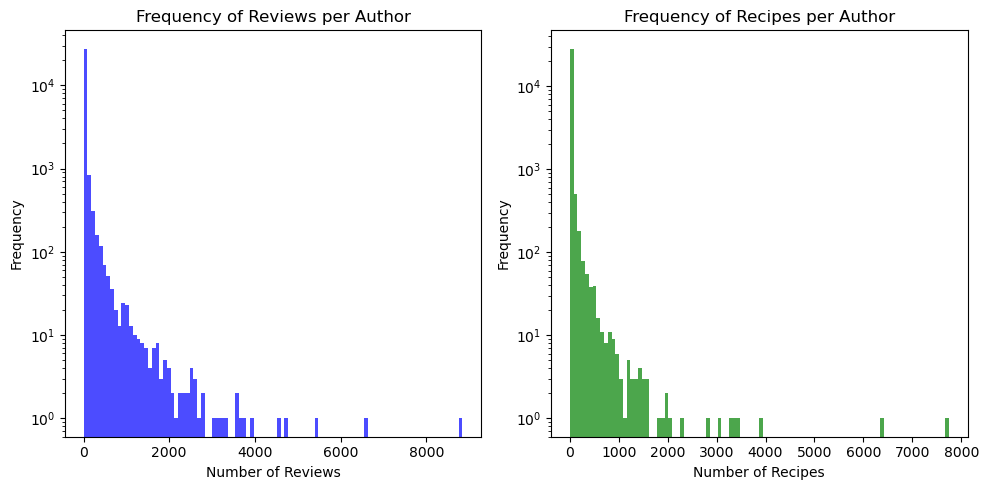

In [5]:
# Find the intersection of unique AuthorIds
intersection_authors = set(recipes['AuthorId']).intersection(set(reviews['AuthorId']))

recipes_intersection = recipes[recipes['AuthorId'].isin(intersection_authors)]
reviews_intersection = reviews[reviews['AuthorId'].isin(intersection_authors)]

print(f"{np.round(len(intersection_authors)/len(recipes_intersection), 3)}% of authors in the 'recipe' df are also in the 'reviews' recipes.")
print(f"{np.round(len(intersection_authors)/len(reviews_intersection), 3)}% of authors in the 'reviews' recipes are also in the 'recipe' recipes.")

# Histograms of the frequency of reviews per author and recipes per author
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(reviews_intersection['AuthorId'].value_counts(), bins=100, color='blue', alpha=0.7, log=True)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Frequency of Reviews per Author')

plt.subplot(1, 2, 2)
plt.hist(recipes_intersection['AuthorId'].value_counts(), bins=100, color='green', alpha=0.7, log=True)
plt.xlabel('Number of Recipes')
plt.ylabel('Frequency')
plt.title('Frequency of Recipes per Author')

plt.tight_layout()
plt.show()

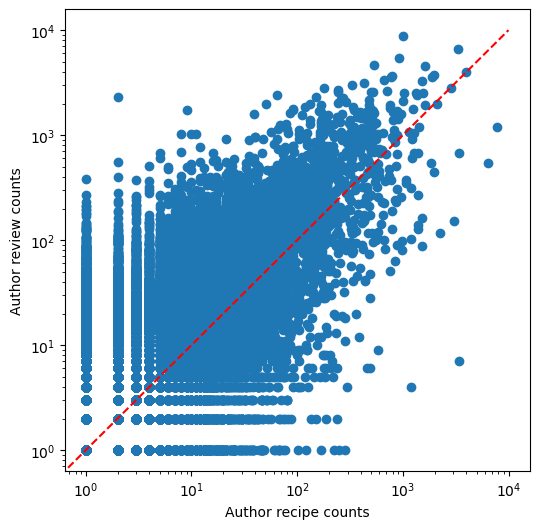

In [6]:
authors_review_counts = reviews.groupby(['AuthorId']).size().sort_values()
authors_recipe_counts = recipes.groupby(['AuthorId']).size().sort_values()

author_counts = pd.merge(authors_review_counts.to_frame(name='count'), 
                         authors_recipe_counts.to_frame(name='count'), 
                         how='outer', left_index=True, right_index=True, suffixes=['_reviews', '_recipes'])

author_counts.fillna(0, inplace=True)
author_counts

plt.figure(figsize=(6, 6))

plt.scatter(x=author_counts['count_recipes'],
            y=author_counts['count_reviews'])
plt.plot([0,10**4], [0,10**4], 'r--')
plt.xlabel('Author recipe counts')
plt.ylabel('Author review counts')

plt.xscale('log')
plt.yscale('log')

plt.show()


### Understanding attributes of recipes

In [7]:
recipes.head()
recipes.columns

cont_features_recipes = ['PrepTime', 'CookTime', 'TotalTime', 'AggregatedRating', 'ReviewCount', 'Calories', 
                         'FatContent','SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 
                         'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings']
cat_features_recipes = ['RecipeCategory']

# This could be somehow turned into categorical variables or help create new categories
other_features_recipes = ['Description', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'RecipeInstructions']

remaining_features_recipes = [col for col in recipes.columns if col not in (cont_features_recipes+cat_features_recipes+other_features_recipes)]


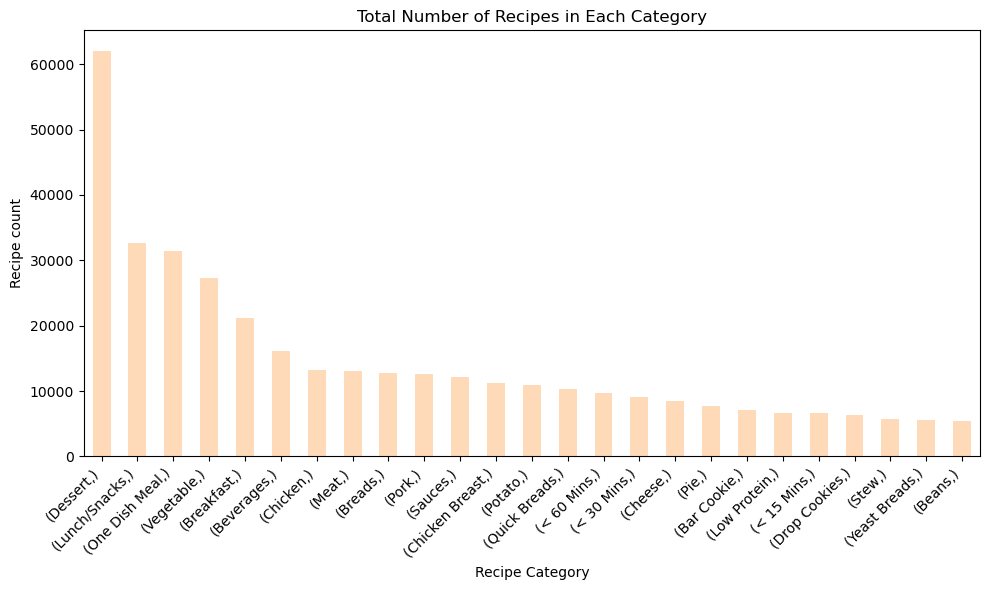

In [8]:
recipe_cats_count = recipes[cat_features_recipes].value_counts()
recipe_cats_count.head(30)

plt.figure(figsize=(10, 6)) 
recipe_cats_count.head(25).plot(kind='bar', color='peachpuff')
plt.xlabel('Recipe Category')
plt.ylabel('Recipe count')
plt.title('Total Number of Recipes in Each Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [10]:
recipes[other_features_recipes].head()

,Description,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,RecipeInstructions
0,Make and share this Low-Fat Berry Blue Frozen ...,"[Dessert, Low Protein, Low Cholesterol, Health...","[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...","[Toss 2 cups berries with sugar., Let stand fo..."
1,Make and share this Biryani recipe from Food.com.,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...","[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",[Soak saffron in warm milk for 5 minutes and p...
2,This is from one of my first Good House Keepi...,"[Low Protein, Low Cholesterol, Healthy, Summer...","[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...","[Into a 1 quart Jar with tight fitting lid, pu..."
3,This dish is best prepared a day in advance to...,"[Beans, Vegetable, Low Cholesterol, Weeknight,...","[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...","[Drain the tofu, carefully squeezing out exces..."
4,Make and share this Cabbage Soup recipe from F...,"[Low Protein, Vegan, Low Cholesterol, Healthy,...","[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...","[Mix everything together and bring to a boil.,..."


In [11]:
series = recipes['Keywords']
string_frequency = {}

for array in series:
    for string in array:
        string_frequency[string] = string_frequency.get(string, 0) + 1

print(string_frequency)
top_feqs = list(string_frequency.values())
top_feqs.sort(reverse=True)

top_feqs[:30]

top_keywords = [k for k in string_frequency if string_frequency[k] >= top_feqs[60]]
series


{'Dessert': 43342, 'Low Protein': 63972, 'Low Cholesterol': 74121, 'Healthy': 83305, 'Free Of...': 23158, 'Summer': 18686, 'Weeknight': 44914, 'Freezer': 2931, 'Easy': 276838, 'Chicken Thigh & Leg': 1467, 'Chicken': 28312, 'Poultry': 46278, 'Meat': 103191, 'Asian': 25424, 'Indian': 5998, 'Stove Top': 38254, '< 60 Mins': 149589, 'Beans': 14250, 'Vegetable': 81264, 'Broil/Grill': 2958, 'Oven': 54504, 'Vegan': 19057, 'Winter': 13956, '< 4 Hours': 111071, 'Thai': 2162, '< 30 Mins': 112229, 'Cookie & Brownie': 28039, 'Fruit': 60523, 'Nuts': 13739, 'European': 47121, 'Very Low Carbs': 17287, 'High Protein': 13003, 'High In...': 22127, '< 15 Mins': 89340, 'For Large Groups': 41337, 'No Cook': 11077, 'Pineapple': 3460, 'Tropical Fruits': 10298, 'Mexican': 12620, 'Black Beans': 1810, 'Spring': 7016, 'Berries': 11587, 'Corn': 2700, None: 17237, 'Breads': 17371, 'South American': 2335, 'Lactose Free': 7290, 'Egg Free': 9690, 'Refrigerator': 8949, 'Rice': 9249, 'Apple': 8585, 'Grapes': 473, 'Citru

0         [Dessert, Low Protein, Low Cholesterol, Health...
1         [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2         [Low Protein, Low Cholesterol, Healthy, Summer...
3         [Beans, Vegetable, Low Cholesterol, Weeknight,...
4         [Low Protein, Vegan, Low Cholesterol, Healthy,...
                                ...                        
522512                                          [< 4 Hours]
522513                [High Protein, High In..., < 4 Hours]
522514                                 [Dessert, < 4 Hours]
522515                                    [< 15 Mins, Easy]
522516                                          [< 60 Mins]
Name: Keywords, Length: 522517, dtype: object

In [12]:
from collections import Counter

keywords_flat = [keyword for sublist in recipes['Keywords'] for keyword in sublist]
all_keywords = recipes['RecipeCategory'].tolist() + keywords_flat

# Count the frequency of each unique value
frequency_counter = Counter(all_keywords)

keyword_freqs = pd.DataFrame.from_dict(frequency_counter, orient='index', columns=['Frequency']).reset_index()
keyword_freqs.columns = ['Name', 'Frequency']
keyword_freqs = keyword_freqs.sort_values(by='Frequency', ascending=False)

keyword_freqs

,Name,Frequency
125,Easy,277565
12,< 60 Mins,159308
44,< 30 Mins,121249
33,Meat,116322
114,< 4 Hours,116040
...,...,...
271,Margarita,1
270,Fish Tuna,1
269,Bread Pudding,1
318,Served Hot New Years,1


In [14]:
regions = pd.read_pickle("../data/clean_columns/regiondatav0.pk")
regions

,Name,RegionKeywords,Continents,Regions
RecipeId,,,,
49,chicken breasts lombardi,"[italian, european]",[european],[italian]
55,betty crocker's southwestern guacamole dip,"[southwestern u.s., mexican]",[north american],"[southwestern u.s., mexican]"
58,low-fat burgundy beef & vegetable stew,[french],[european],[french]
59,lou's fabulous bruschetta,"[italian, european]",[european],[italian]
62,"black bean, corn, and tomato salad",[polish],[european],[polish]
...,...,...,...,...
539115,dutch fried potatoes (gebakken aardappelen),"[dutch, european]",[european],[dutch]
539152,stir fried noodles (mie goreng),"[indonesian, asian, dutch, european]","[asian, european]","[indonesian, dutch]"
539182,cinnamony sweet moroccan orange salad,"[moroccan, african]",[african],[moroccan]
